# Restaurant Sales report

### Business scenario 

Restaurant's aims to analyze sales trends and identify the most preferred food items by customers. This analysis will guide them in strategically stocking up on these items during specific times, enhancing their sales potential in the upcoming period.

### Business Objectives

1) Analyse sales trends over time.
2) Understand customer preferences for different items.
3) Evaluate the impact of payment methods on revenue.
4) Investigat the performance of staff members based on gender.
5) Explore the popularity of items at different times of the day.

##### Data Dict.

1) order_id: a unique identifier for each order.
2) date: date of the transaction.
3) item_name: name of the food.
4) item_type: category of item (Fastfood or Beverages).
5) item_price: price of the item for 1 quantity.
6) Quantity: how much quantity the customer orders.
7) transaction_amount: the total amount paid by customers.
8) transaction_type: payment method (cash, online, others).
9) received_by: gender of the person handling the transaction.
10) time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
data = pd.read_csv("Balaji Fast Food Sales.csv")

##### 

#### Data Understanding

In [3]:
data.shape

(1000, 10)

In [4]:
data = data.drop_duplicates()

In [5]:
data.shape

(1000, 10)

In [6]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [7]:
data.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [8]:
data.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [10]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [11]:
data.nunique()

order_id              1000
date                   348
item_name                7
item_type                2
item_price               5
quantity                15
transaction_amount      48
transaction_type         2
received_by              2
time_of_sale             5
dtype: int64

##### 

#### Statistical Summary

In [12]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


###### 

#### Defining categorical and numerical columns

In [13]:
def cat_num(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtypes == 'O':
            categorical.append(i)
        else:
            numerical.append(i)
            
    return categorical, numerical
    
categorical, numerical = cat_num(data)
    
print(tabulate({"Categorical":categorical,
                "Numerical": numerical}, headers = ["Categorical", "Numerical"],tablefmt="fancy_grid"))

╒══════════════════╤════════════════════╕
│ Categorical      │ Numerical          │
╞══════════════════╪════════════════════╡
│ date             │ order_id           │
├──────────────────┼────────────────────┤
│ item_name        │ item_price         │
├──────────────────┼────────────────────┤
│ item_type        │ quantity           │
├──────────────────┼────────────────────┤
│ transaction_type │ transaction_amount │
├──────────────────┼────────────────────┤
│ received_by      │                    │
├──────────────────┼────────────────────┤
│ time_of_sale     │                    │
╘══════════════════╧════════════════════╛


#### Imput missing values

In [14]:
a = data.isnull().sum()
a[a>0]

transaction_type    107
dtype: int64

Transaction type is a Categorical column so imputing missing values with mode

In [15]:
data["transaction_type"].fillna(data["transaction_type"].mode()[0], inplace = True)

In [16]:
data.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

### 

#### Outliers Identification

In [17]:
numerical

['order_id', 'item_price', 'quantity', 'transaction_amount']

#### Item Price

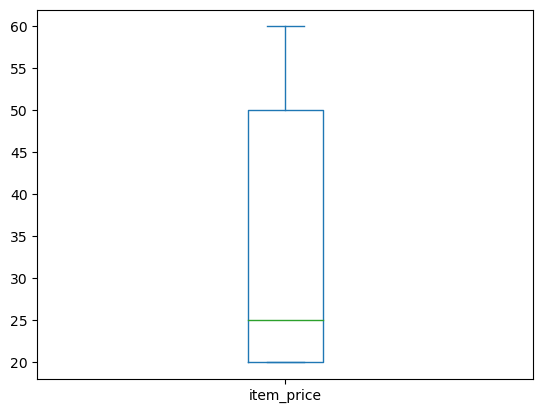

In [18]:
data["item_price"].plot(kind= "box",stacked = False)
plt.show()

#### 

#### Quantity

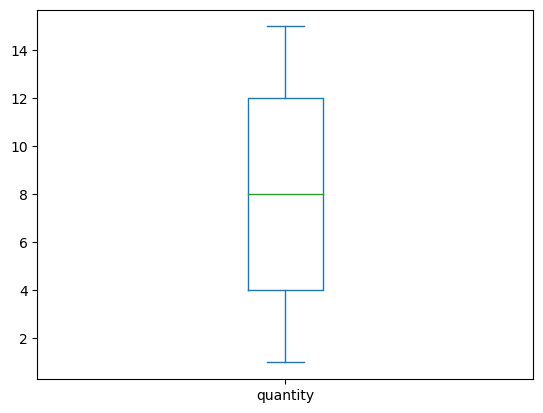

In [19]:
data["quantity"].plot(kind= "box",stacked = False)
plt.show()

###### 

#### Transaction Amount

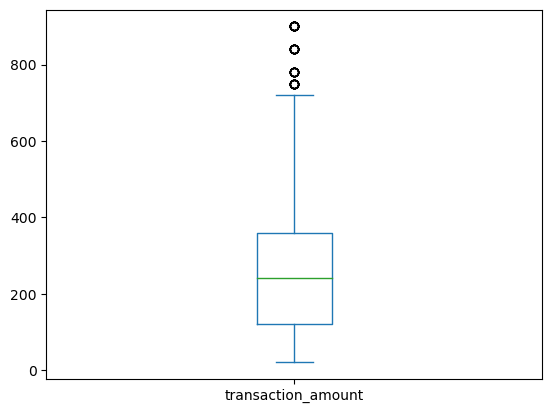

In [20]:
data["transaction_amount"].plot(kind = "box", stacked = False)
plt.show()

### Interpretation:
The data in the item price column exhibits right skewness, although no outliers are apparent in that column. In the quantity column, the data is not skewed. However, in the transaction amount column, there is right skewness, and some outliers are present.

###### 

#### Outliers treatement

In [21]:
# Defining function for outliers treatment

def treat_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)

    IQR = Q3 - Q1

    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    outliers = (data[x] < LF) | (data[x] > UF)

    data.loc[outliers, x] = data[x].mean()

    return data

#### Transaction amount

In [22]:
data = treat_outliers(data,"transaction_amount")

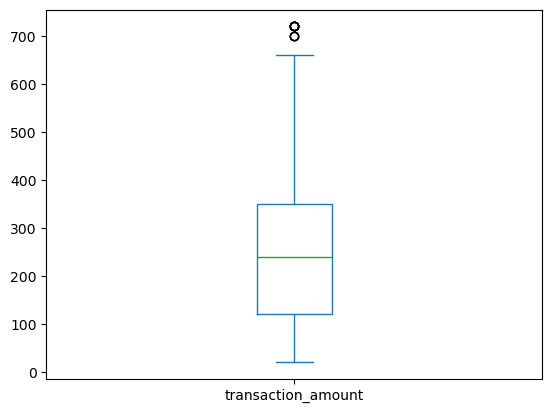

In [23]:
data["transaction_amount"].plot(kind = "box", stacked = False)
plt.show()

### Interpretation 
Outliers in the transaction amount column have been removed, as evident from the visual comparison between the data before and after the removal. However, a few outliers still persist in the dataset.

#### 

### Exporting cleaned data

In [24]:
data.to_csv("Balaji_Fast-Food_Sales_cleaned_data.csv")

In [25]:
import os
os.getcwd()

'C:\\Users\\SHUBH\\Downloads'